# **Telecomunicaciones: identificar operadores ineficientes**

La telefonía virtual CallMeMaybe presta un servicio a **organizaciones que necesitan distribuir gran cantidad de llamadas** entrantes entre varios operadores, o realizar llamadas salientes a través de sus operadores. Los operadores a su ves pueden realizar llamadas internas para comunicarse entre ellos. Estas llamadas se realizan a través de la red de CallMeMaybe.

Para mejorar el servicio se está desarrollando una nueva función que brindará a los supervisores y las supervisores **información sobre los operadores menos eficaces**. 

Para ello se busca **analizar la cantidad de llamadas perdidas entrantes y salientes, tiempo de espera y la cantidad de llamadas salientes, determinando una perspectiva de las condiciones de los operadores menos eficaces**


# Descripción de los datos
El dataset **df_operator** ('telecom_dataset_us.csv') evidencia las operaciones realizadas por los operadores y sus metricas cuantificadas acerca de su trabajo; las siguientes columnas contienen:
- `user_id`: ID de la cuenta de cliente
- `date`: fecha en la que se recuperaron las estadísticas con formato ISO (agrega la zona horaria)
- `direction`: "dirección" de llamada (`out` para saliente, `in` para entrante)
- `internal`: si la llamada fue interna (entre los operadores de un cliente o clienta)
- `operator_id`: identificador del operador
- `is_missed_call`: si fue una llamada perdida
- `calls_count`: número de llamadas
- `call_duration`: duración de la llamada (sin incluir el tiempo de espera)
- `total_call_duration`: duración de la llamada (incluido el tiempo de espera)

El dataset **df_client** ('telecom_clients_us.csv') expone el perfil del usuario a traves de su tarifa y el uso del servicio; las siguientes columnas contienen:
- `user_id`: ID de usuario/a
- `tariff_plan`: tarifa actual de la clientela
- `date_start`: fecha de registro de la clientela

# Estructura del proyecto
1. EDA (Preprocesamiento de datos)
    1. Importar datasets y optimizar sus valores según el tipo de datos que requiera
    2. Formatear valores
    3. Analizar los valores nulos y duplicados de los datos
    4. Revisión de correlación de las caracteristicas del servicio recibido por los clientes
    5. Revisar las metricas (promedio | mediana) de las características de operadores y clientes
2. Análisis de patrones temporales: Revisar si existe una causa que justifique la ineficiencia de un operador
3. Análisis de cohortes (fecha y comportamiento)
4. Calcular los KPIs significativos y graficos necesarios
5. Contruir un modelo piloto para predecir los operadores ineficientes (aprendizaje supervisado)
6. Dashboard de visualizaciones
7. Presentación de conclusiones
8. Concluciones generales

# Bibliografia
- Estructuración de  analisis (https://telecoms.adaptit.tech/es/blog/data-analytics-the-key-to-kpi-analysis/)
- Partes del analisis e importancia de modelos predictivos(https://towardsdatascience.com/what-is-predictive-analytics-dc6db9759936)
- Segmentación de los clientes y posibleas causas de externas de ineficiencia (https://telecoms.adaptit.tech/es/blog/what-is-customer-analytics-in-telecoms/)
- Ejemplos de KPIs relevantes en el sector (https://www.zendesk.com.mx/blog/kpis-experiencia-cliente/)
- Ejemplo de estructuración del dashboard (https://www.datapine.com/blog/call-center-dashboard-reports-and-data-analytics/#call-center-metrics)
- Importancia de los modelos predictivos para la optimización de los servicios en telecomunicaciones (https://www.matellio.com/blog/predictive-analytics-in-telecom/)


# Hipotesis

Una posible manera de determinar las condiciones de los operadores menos eficaces, se deben tener en cuenta que existen muchos valores atipicos, por tanto se tiene como valores de referencia las medianas aritmeticas. `Esto nos permitio poner un margen preliminar para la identificación de las operaciones de los operadores`
- La cantidad de llamadas perdidas externas perdidas tiene como limite superior entre 7 a 11, respecto a las llamadas internas no debe supera de 2 a 3.`Se determino que los operadores que tuviesen más del 50% de las llamadas perdidas, son un factor a tener en cuenta para sue valuación`
- El tiempo de espera no debe ser mayor a 80 en general, sin embargo el plan A tienen de 3 a 4 veces más de duración en las llamadas lo que puede se un factor a tener en cuenta se los operadores son fijos para cada operador, lo que dificultaria la respuesta de estos, como se muestra en una correlación directa . Se debe tener en cuenta queel plan C es el mas popular, tiene el menos tiempo de duracion de llamadas y un promedo de tiempo de espera de 50.`Se ven anomalias a lo largo del tiempo en las llamadas perdidas del plan  y aa lo largo del aanalisis, se muestra con se superan las llamadas perdidas a laas contetadas, de modo que se recomiento una optimización de procesos en las operaciones`
- En general el promedio del tiempo de las llamadas externas es superior a 500, mientras que las internas rondas las 50 a 100 aproximadamente, para tener en cuenta la carga laboral de los operadores. `Este es aun factor determinante para la clasificación de los operadores, esto es por que el percentil de operadores que superiore al 90% respecto a sus compañeros, entrara en una clasifición de ineficiencia`
- La mediana de llamadas salientes es de 100, llegando a 200 el 75% de las veces.`Esto da una tendencia de las tareas que cumplen los operadores`

<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA-(Preprocesamiento-de-datos)" data-toc-modified-id="EDA-(Preprocesamiento-de-datos)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA (Preprocesamiento de datos)</a></span><ul class="toc-item"><li><span><a href="#Importar-datasets-y-optimizar-sus-valores-según-el-tipo-de-datos-que-requiera" data-toc-modified-id="Importar-datasets-y-optimizar-sus-valores-según-el-tipo-de-datos-que-requiera-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importar datasets y optimizar sus valores según el tipo de datos que requiera</a></span></li><li><span><a href="#Formatear-valores" data-toc-modified-id="Formatear-valores-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Formatear valores</a></span></li><li><span><a href="#Analizar-los-valores-nulos-y-duplicados-de-los-datos" data-toc-modified-id="Analizar-los-valores-nulos-y-duplicados-de-los-datos-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Analizar los valores nulos y duplicados de los datos</a></span><ul class="toc-item"><li><span><a href="#Procesamiento-valores-nulos" data-toc-modified-id="Procesamiento-valores-nulos-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Procesamiento valores nulos</a></span></li><li><span><a href="#Registro-duplicados" data-toc-modified-id="Registro-duplicados-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Registro duplicados</a></span></li></ul></li><li><span><a href="#Revisión-de-correlación-de-las-caracteristicas-del-servicio-recibido-por-los-clientes" data-toc-modified-id="Revisión-de-correlación-de-las-caracteristicas-del-servicio-recibido-por-los-clientes-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Revisión de correlación de las caracteristicas del servicio recibido por los clientes</a></span></li></ul></li><li><span><a href="#Análisis-de-patrones-temporales:-Existe-una-causa-que-justifique-la-ineficiencia-de-un-operador" data-toc-modified-id="Análisis-de-patrones-temporales:-Existe-una-causa-que-justifique-la-ineficiencia-de-un-operador-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Análisis de patrones temporales: Existe una causa que justifique la ineficiencia de un operador</a></span><ul class="toc-item"><li><span><a href="#Operadores" data-toc-modified-id="Operadores-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Operadores</a></span><ul class="toc-item"><li><span><a href="#Comportamiento-de-la-dirección-y-el-estado-de-las-llamadas,-en-general-y-puntualmente" data-toc-modified-id="Comportamiento-de-la-dirección-y-el-estado-de-las-llamadas,-en-general-y-puntualmente-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Comportamiento de la dirección y el estado de las llamadas, en general y puntualmente</a></span></li><li><span><a href="#Comportamiento-de-la-dirección-y-el-estado-de-las-llamadas,-en-el-tiempo-de-espera-de-llamadas" data-toc-modified-id="Comportamiento-de-la-dirección-y-el-estado-de-las-llamadas,-en-el-tiempo-de-espera-de-llamadas-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Comportamiento de la dirección y el estado de las llamadas, en el tiempo de espera de llamadas</a></span></li><li><span><a href="#Promedio-de-la-cantidad-de-llamadas,-segun-el-estado-de-estas" data-toc-modified-id="Promedio-de-la-cantidad-de-llamadas,-segun-el-estado-de-estas-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Promedio de la cantidad de llamadas, segun el estado de estas</a></span></li><li><span><a href="#Promedio-de-la-cantidad-de-llamadas,-segun-al-estado-de-estas" data-toc-modified-id="Promedio-de-la-cantidad-de-llamadas,-segun-al-estado-de-estas-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Promedio de la cantidad de llamadas, segun al estado de estas</a></span></li></ul></li><li><span><a href="#Clientes" data-toc-modified-id="Clientes-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Clientes</a></span><ul class="toc-item"><li><span><a href="#Cantidad-de-plan-adquiridos-por-usuarios" data-toc-modified-id="Cantidad-de-plan-adquiridos-por-usuarios-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Cantidad de plan adquiridos por usuarios</a></span></li><li><span><a href="#Promedio-de-la-duración-de-las-llamadas-segun-el-plan-de-los-clientes-y-el-estado-de-las-llamadas" data-toc-modified-id="Promedio-de-la-duración-de-las-llamadas-segun-el-plan-de-los-clientes-y-el-estado-de-las-llamadas-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Promedio de la duración de las llamadas segun el plan de los clientes y el estado de las llamadas</a></span></li><li><span><a href="#Tiempo-de-espera-de-los-planes-de-cada-cliente-y-el-estado-de-las-llamadas" data-toc-modified-id="Tiempo-de-espera-de-los-planes-de-cada-cliente-y-el-estado-de-las-llamadas-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Tiempo de espera de los planes de cada cliente y el estado de las llamadas</a></span></li></ul></li></ul></li><li><span><a href="#Análisis-de-cohortes-(fecha-y-comportamiento)" data-toc-modified-id="Análisis-de-cohortes-(fecha-y-comportamiento)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Análisis de cohortes (fecha y comportamiento)</a></span><ul class="toc-item"><li><span><a href="#Tasa-de-retensión-de-los-clientes" data-toc-modified-id="Tasa-de-retensión-de-los-clientes-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Tasa de retensión de los clientes</a></span></li><li><span><a href="#Cantidad-de-llamadas" data-toc-modified-id="Cantidad-de-llamadas-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Cantidad de llamadas</a></span><ul class="toc-item"><li><span><a href="#Cantidad-de-llamadas-recibidas" data-toc-modified-id="Cantidad-de-llamadas-recibidas-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Cantidad de llamadas recibidas</a></span></li></ul></li></ul></li><li><span><a href="#Calcular-los-KPIs-significativos" data-toc-modified-id="Calcular-los-KPIs-significativos-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Calcular los KPIs significativos</a></span><ul class="toc-item"><li><span><a href="#Customer-Effort-Score-(CES)" data-toc-modified-id="Customer-Effort-Score-(CES)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Customer Effort Score (CES)</a></span></li><li><span><a href="#Net-Promoter-Score-(NPS)" data-toc-modified-id="Net-Promoter-Score-(NPS)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Net Promoter Score (NPS)</a></span></li><li><span><a href="#First-Response-Time-(FRT)" data-toc-modified-id="First-Response-Time-(FRT)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>First Response Time (FRT)</a></span></li><li><span><a href="#Tiempo-de-espera" data-toc-modified-id="Tiempo-de-espera-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Tiempo de espera</a></span></li></ul></li><li><span><a href="#Contruir-un-modelo-piloto-para-predecir-los-operadores-ineficientes-(aprendizaje-supervisado)" data-toc-modified-id="Contruir-un-modelo-piloto-para-predecir-los-operadores-ineficientes-(aprendizaje-supervisado)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Contruir un modelo piloto para predecir los operadores ineficientes (aprendizaje supervisado)</a></span><ul class="toc-item"><li><span><a href="#Preparación-de-las-categorias" data-toc-modified-id="Preparación-de-las-categorias-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Preparación de las categorias</a></span></li><li><span><a href="#Modelo" data-toc-modified-id="Modelo-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Modelo</a></span></li></ul></li><li><span><a href="#Presentación-de-conclusiones" data-toc-modified-id="Presentación-de-conclusiones-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Presentación de conclusiones</a></span></li><li><span><a href="#Concluciones-generales" data-toc-modified-id="Concluciones-generales-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Concluciones generales</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score

## EDA (Preprocesamiento de datos)

### Importar datasets y optimizar sus valores según el tipo de datos que requiera

In [2]:
# Importación de datos de las operaciones de los operadores
df_operator = pd.read_csv('/datasets/telecom_dataset_us.csv', 
                          dtype={'direction':'category', 'internal':'boolean'}, 
                          parse_dates = ['date'])
display(df_operator.info())
display(df_operator.describe(include='all', datetime_is_numeric=True))
display(df_operator.head())
print('Cuenta con',df_operator.duplicated().sum(),'datos duplicados')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              53902 non-null  int64                                
 1   date                 53902 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            53902 non-null  category                             
 3   internal             53785 non-null  boolean                              
 4   operator_id          45730 non-null  float64                              
 5   is_missed_call       53902 non-null  bool                                 
 6   calls_count          53902 non-null  int64                                
 7   call_duration        53902 non-null  int64                                
 8   total_call_duration  53902 non-null  int64                                
dtypes: bool

None

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
count,53902.000000,53902,53902,53785,45730.000000,53902,53902.000000,53902.000000,53902.000000
unique,NaN,NaN,2,2,NaN,2,NaN,NaN,NaN
top,NaN,NaN,out,False,NaN,False,NaN,NaN,NaN
freq,NaN,NaN,31917,47621,NaN,30334,NaN,NaN,NaN
mean,167295.344477,2019-10-23 01:00:32.191755520+03:00,NaN,NaN,916535.993002,NaN,16.451245,866.684427,1157.133297
min,166377.000000,2019-08-02 00:00:00+03:00,NaN,NaN,879896.000000,NaN,1.000000,0.000000,0.000000
25%,166782.000000,2019-10-04 00:00:00+03:00,NaN,NaN,900788.000000,NaN,1.000000,0.000000,47.000000
50%,167162.000000,2019-10-28 00:00:00+03:00,NaN,NaN,913938.000000,NaN,4.000000,38.000000,210.000000
75%,167819.000000,2019-11-14 00:00:00+03:00,NaN,NaN,937708.000000,NaN,12.000000,572.000000,902.000000
max,168606.000000,2019-11-28 00:00:00+03:00,NaN,NaN,973286.000000,NaN,4817.000000,144395.000000,166155.000000


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


Cuenta con 4900 datos duplicados


- La columna 'internal' cuenta con 117 valores nulo, además las columna 'operator_id' con 8.172 valores nulos, siendo un 17% de los valores; se determina como decimal (float64) por estos valores. Además cuenta con 4900 datos duplicados, siendo un 10%.

In [3]:
# Importación de datos de los clientes
df_client = pd.read_csv('/datasets/telecom_clients_us.csv',
                        dtype={'tariff_plan':'category',},
                        parse_dates =['date_start'])
display(df_client.info())
display(df_client.describe(include='all', datetime_is_numeric=True))
display(df_client.head())
print('Cuenta con', df_client.duplicated().sum(),'datos duplicados')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    category      
 2   date_start   732 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 12.4 KB


None

,user_id,tariff_plan,date_start
count,732.000000,732,732
unique,NaN,3,NaN
top,NaN,C,NaN
freq,NaN,395,NaN
mean,167431.927596,NaN,2019-09-14 16:39:20.655737600
min,166373.000000,NaN,2019-08-01 00:00:00
25%,166900.750000,NaN,2019-08-23 00:00:00
50%,167432.000000,NaN,2019-09-16 00:00:00
75%,167973.000000,NaN,2019-10-08 00:00:00
max,168606.000000,NaN,2019-10-31 00:00:00


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


Cuenta con 0 datos duplicados


### Formatear valores

In [4]:
# Formatear las fechas con el día
df_operator['date'] = pd.to_datetime(df_operator['date'])
df_operator['date_format'] = df_operator['date'].dt.date
df_operator['month_format'] = df_operator['date'].dt.month
df_operator['day_format'] = df_operator['date'].dt.strftime('%m-%d')

# Calcular la diferencia del tiempo de espera por llamada
df_operator['call_waiting_time'] = df_operator['total_call_duration'] - df_operator['call_duration'] 
display(df_operator.head())

# Formatear las fechas con el día
df_client['date_start'] = df_client['date_start'].dt.date
df_client['date_start'] = pd.to_datetime(df_client['date_start'])
df_client['month_start'] = df_client['date_start'].dt.month
df_client['day_start'] = df_client['date_start'].dt.strftime('%m-%d')

display(df_client.head())

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,date_format,month_format,day_format,call_waiting_time
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4,2019-08-04,8,08-04,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,2019-08-05,8,08-05,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,2019-08-05,8,08-05,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18,2019-08-05,8,08-05,8
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,2019-08-05,8,08-05,25


,user_id,tariff_plan,date_start,month_start,day_start
0,166713,A,2019-08-15,8,08-15
1,166901,A,2019-08-23,8,08-23
2,168527,A,2019-10-29,10,10-29
3,167097,A,2019-09-01,9,09-01
4,168193,A,2019-10-16,10,10-16


### Analizar los valores nulos y duplicados de los datos

#### Procesamiento valores nulos

In [5]:
# Revisión y porcesamiento parcial de los valores nulos de los operadores
display(df_operator.isna().sum())
df_operator=df_operator[~df_operator['operator_id'].isna()]
display(df_operator.isna().sum())

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
date_format               0
month_format              0
day_format                0
call_waiting_time         0
dtype: int64

user_id                 0
date                    0
direction               0
internal               60
operator_id             0
is_missed_call          0
calls_count             0
call_duration           0
total_call_duration     0
date_format             0
month_format            0
day_format              0
call_waiting_time       0
dtype: int64

#### Registro duplicados

In [6]:
# Revisión de los registro duplicados
print('El número total de registros de las operaciones de los operadores son {} y cuenta con {} ({}%) duplicados'.format(len(df_operator), df_operator.duplicated().sum(),((df_operator.duplicated().sum()/len(df_operator))*100).round(2)))
print('El número total de registros de los clientes son {} y cuenta con {} ({}%) duplicados'.format(len(df_client), df_client.duplicated().sum(),((df_client.duplicated().sum()/len(df_client))*100).round(2)))

El número total de registros de las operaciones de los operadores son 45730 y cuenta con 4184 (9.15%) duplicados
El número total de registros de los clientes son 732 y cuenta con 0 (0.0%) duplicados


In [7]:
df_operator.drop_duplicates(inplace=True, ignore_index=True)
print('El número total de registros de las operaciones de los operadores son {} y cuenta con {} ({}%) duplicados'.format(len(df_operator), df_operator.duplicated().sum(),((df_operator.duplicated().sum()/len(df_operator))*100).round(2)))

El número total de registros de las operaciones de los operadores son 41546 y cuenta con 0 (0.0%) duplicados


- Se eliminaron los valores duplicados del dataset de los operadores, ya que no se requiere informacion reiterativa para el analisis

### Revisión de correlación de las caracteristicas del servicio recibido por los clientes

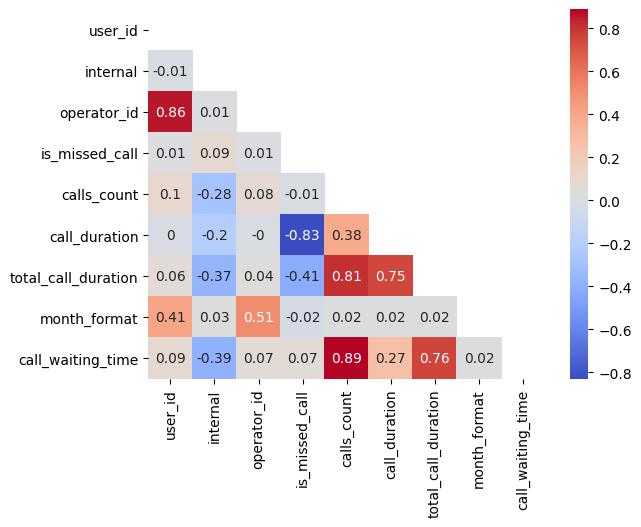

In [8]:
#Unir dataSets de clientes y operadores
df = df_client[['user_id','tariff_plan']]
df = df.merge(df_operator, how='inner', on='user_id')

# Graficar un mapa de calor respecto a la correlación de las variables
corr = df.corr(method='spearman').round(2)
mask = np.triu(np.ones_like(corr, dtype='bool'))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm')
plt.show()

- Se ve una correlación directa entre el tiempo de espera, la cantidad de llamadas y su duración total, además de una aparente relación entre el id de los operadores y el de los clientes; de igual forma se ve una correlación indirecta entre la duración de la llamada y el estado de las llamadas perdidas.

## Análisis de patrones temporales: Existe una causa que justifique la ineficiencia de un operador

### Operadores

#### Comportamiento de la dirección y el estado de las llamadas, en general y puntualmente

In [9]:
# Agrupar respecto a las fechas, la dirección de llamadas y su estado, haciendo el conteo de estas
gpb_direction_missed= df_operator.groupby(['day_format','direction','is_missed_call'])['is_missed_call'].count().reset_index(name='count')
gpb_direction_missed = gpb_direction_missed.pivot(columns=['direction','is_missed_call'],
                                                  index='day_format',
                                                  values='count')

# Agrupar respecto a los meses, la dirección de llamadas y su estado, haciendo el conteo de estas
gpb_direction_missed_monthly = df_operator.groupby(['month_format','direction','is_missed_call'])['is_missed_call'].count().reset_index(name='count')
gpb_direction_missed_monthly = gpb_direction_missed_monthly.pivot(columns=['direction','is_missed_call'],
                                                                  index='month_format',
                                                                  values='count')

gpb_direction_missed_monthly

direction         in         out      
is_missed_call False True  False True 
month_format                          
8                376    18   526   550
9               1904    99  2569  2365
10              4241   250  5342  4663
11              5527   318  6951  5847

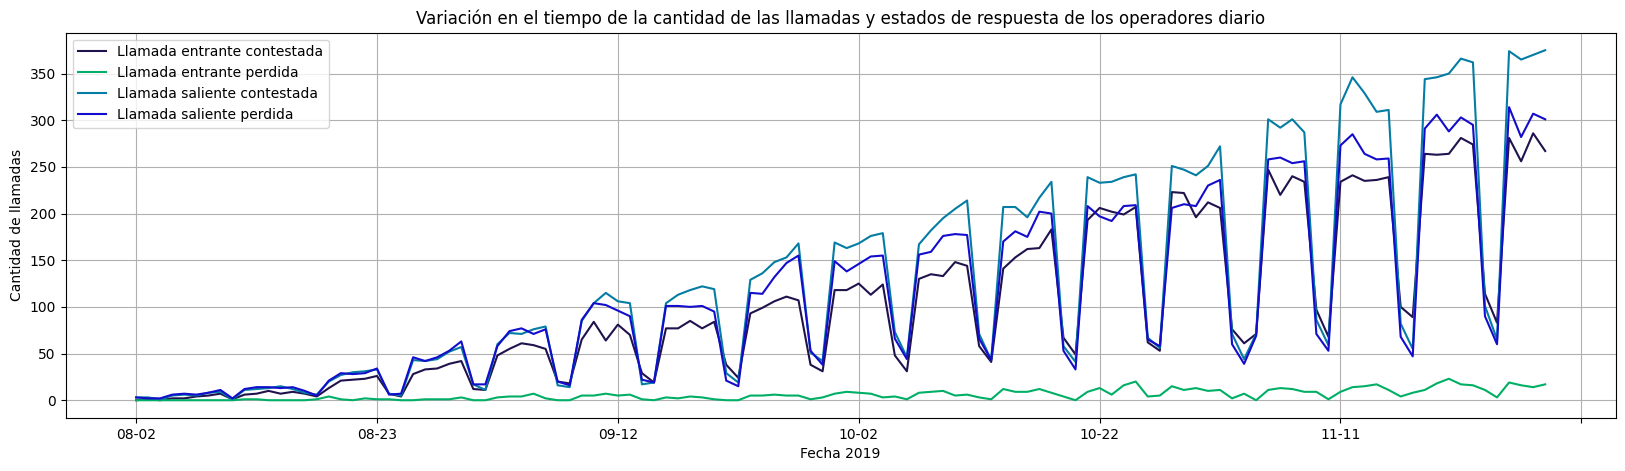

In [10]:
# Grafica de lineas diario
gpb_direction_missed.plot(grid=True, 
                          figsize=[20, 5],
                          title='Variación en el tiempo de la cantidad de las llamadas y estados de respuesta de los operadores diario',
                          xlabel='Fecha 2019',
                          ylabel='Cantidad de llamadas',
                          color=['#20124dff', '#00af65ff','#047ca3ff','#130ccdff']
                         )
plt.legend(['Llamada entrante contestada', 'Llamada entrante perdida', 'Llamada saliente contestada', 'Llamada saliente perdida'])
plt.show()

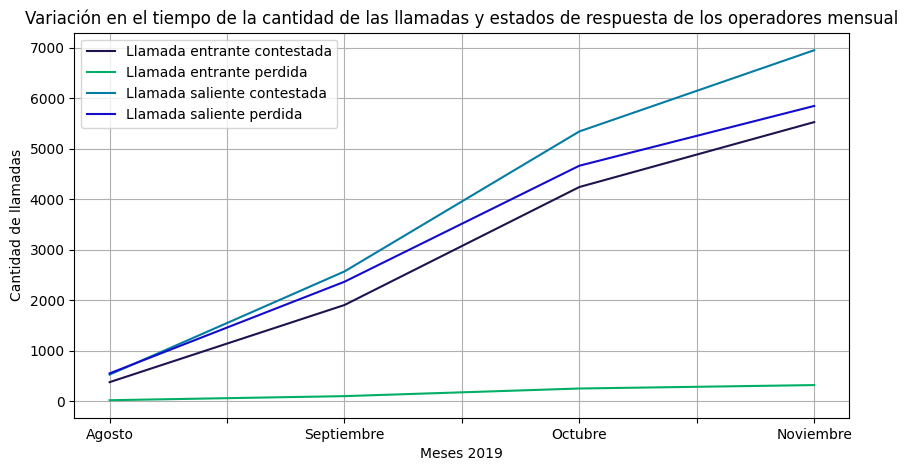

In [11]:
# Grafica de lineas mensual
gpb_direction_missed_monthly.plot(grid=True,
                                  figsize=[10, 5],
                                  title='Variación en el tiempo de la cantidad de las llamadas y estados de respuesta de los operadores mensual',
                                  xlabel='Meses 2019',
                                  ylabel='Cantidad de llamadas',
                                  color=['#20124dff', '#00af65ff','#047ca3ff','#130ccdff']
                                 )

plt.xticks([8, 8.5, 9, 9.5, 10, 10.5, 11 ],['Agosto', ' ','Septiembre',' ', 'Octubre', ' ','Noviembre']) 
plt.legend(['Llamada entrante contestada', 'Llamada entrante perdida', 'Llamada saliente contestada', 'Llamada saliente perdida'])
plt.show()

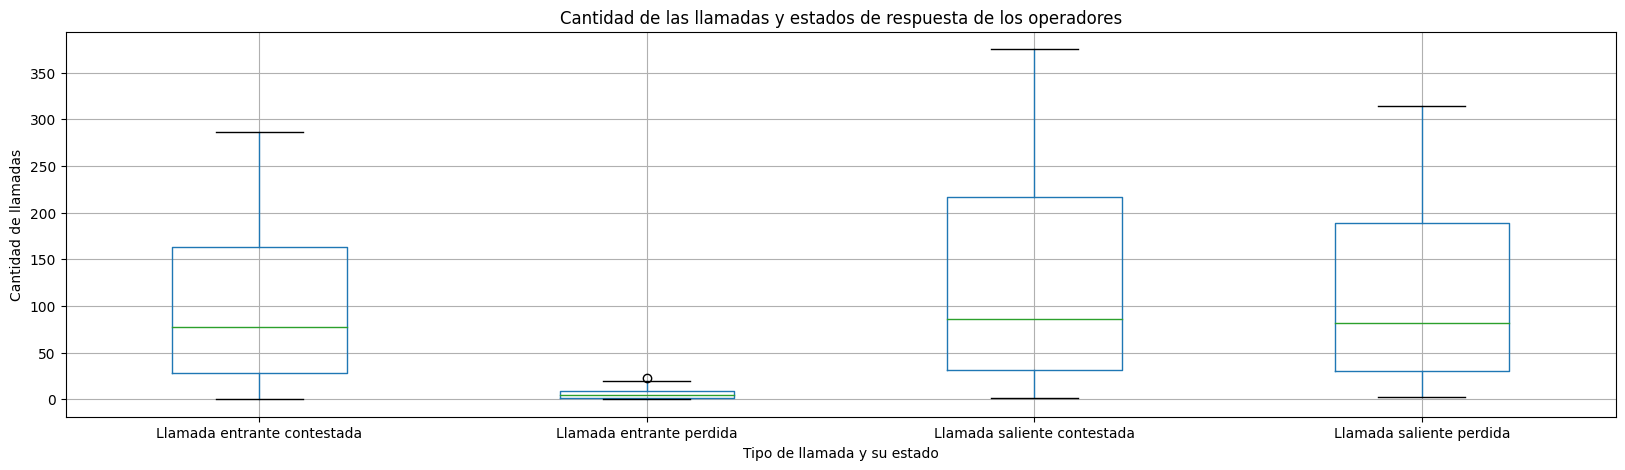

In [12]:
# Grafica de caja
ax = gpb_direction_missed.boxplot(grid=True, 
                                  figsize=[20, 5]
                                 )
labels = ['Llamada entrante contestada', 'Llamada entrante perdida', 'Llamada saliente contestada', 'Llamada saliente perdida']
ax.set_xticklabels(labels)
ax.set_xlabel('Tipo de llamada y su estado')
ax.set_ylabel('Cantidad de llamadas')
ax.set_title('Cantidad de las llamadas y estados de respuesta de los operadores')
plt.show()

- Se ve un aumento constante de dirección de las llamas y la respuesta de las llamadas, sin embargo se ven decensos periodica de manera periodica los fines de semana sin importar de estas sean salientes o entrantes, la unica categoria que se mantiene en un constante son las llamadas entrantes perdidas, teniendo el registro minimo menos a 10 de promedio, a diferencia de las demás categorias (entrante contestada, saliente contestada, saliente perdida) con un promedio aproximado entre 80 a 90 llamadas

#### Comportamiento de la dirección y el estado de las llamadas, en el tiempo de espera de llamadas

In [13]:
# Agrupar respecto a las fechas, la dirección de llamadas y su estado, promediando el tiempo en espera
gpb_waiting_time = df_operator.pivot_table(columns=['direction','is_missed_call'],
                                           index='day_format',
                                           values='call_waiting_time',
                                           aggfunc=['mean','median'])
display(gpb_waiting_time.mean())
gpb_waiting_time=gpb_waiting_time['median']


# Agrupar respecto a los meses, la dirección de llamadas y su estado, promediando el tiempo en espera
gpb_waiting_time_monthly = df_operator.pivot_table(columns=['direction','is_missed_call'],
                                           index='month_format',
                                           values='call_waiting_time',
                                           aggfunc=['mean','median'])

gpb_waiting_time_monthly=gpb_waiting_time_monthly['median']

        direction  is_missed_call
mean    in         False              85.485026
                   True               23.140343
        out        False             452.437710
                   True              544.680353
median  in         False              37.366379
                   True               17.150538
        out        False             100.067797
                   True              120.521186
dtype: float64

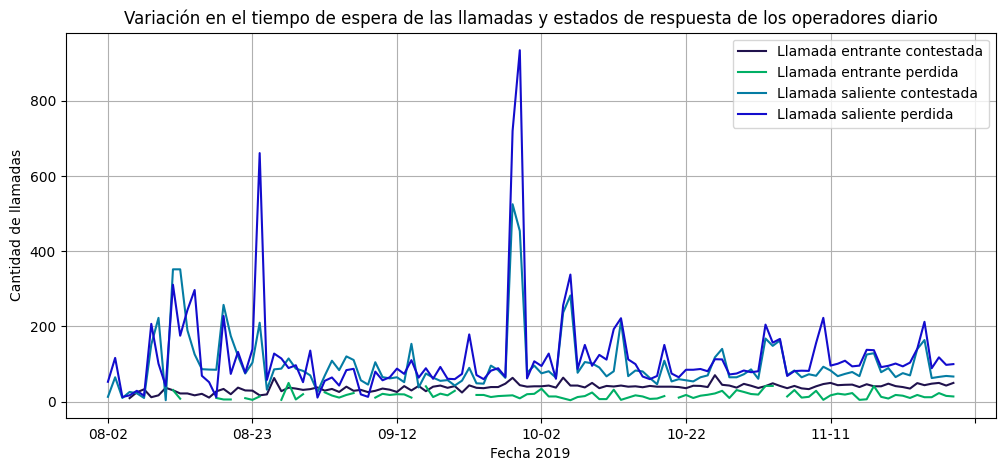

In [14]:
# Grafica de lineas diario
gpb_waiting_time.plot(grid=True, 
                      figsize=[12, 5],
                      title='Variación en el tiempo de espera de las llamadas y estados de respuesta de los operadores diario',
                      xlabel='Fecha 2019',
                      ylabel='Cantidad de llamadas',
                      color=['#20124dff', '#00af65ff','#047ca3ff','#130ccdff']
                     )
plt.legend(['Llamada entrante contestada', 'Llamada entrante perdida', 'Llamada saliente contestada', 'Llamada saliente perdida'])
plt.show()

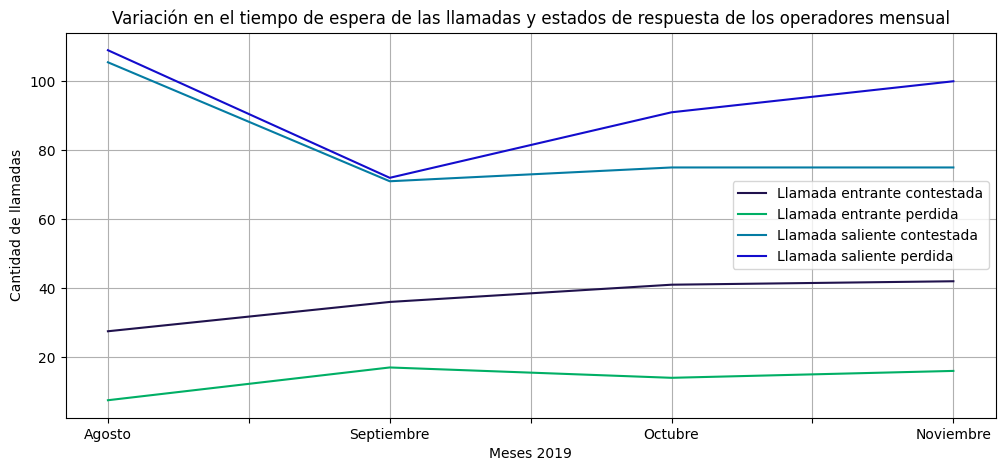

In [15]:
# Grafica de lineas mesual
gpb_waiting_time_monthly.plot(grid=True, 
                      figsize=[12, 5],
                      title='Variación en el tiempo de espera de las llamadas y estados de respuesta de los operadores mensual',
                              xlabel='Meses 2019',
                              ylabel='Cantidad de llamadas',
                              color=['#20124dff', '#00af65ff','#047ca3ff','#130ccdff']
                             )

plt.xticks([8, 8.5, 9, 9.5, 10, 10.5, 11 ],['Agosto', ' ','Septiembre',' ', 'Octubre', ' ','Noviembre']) 
plt.legend(['Llamada entrante contestada', 'Llamada entrante perdida', 'Llamada saliente contestada', 'Llamada saliente perdida'])
plt.show()

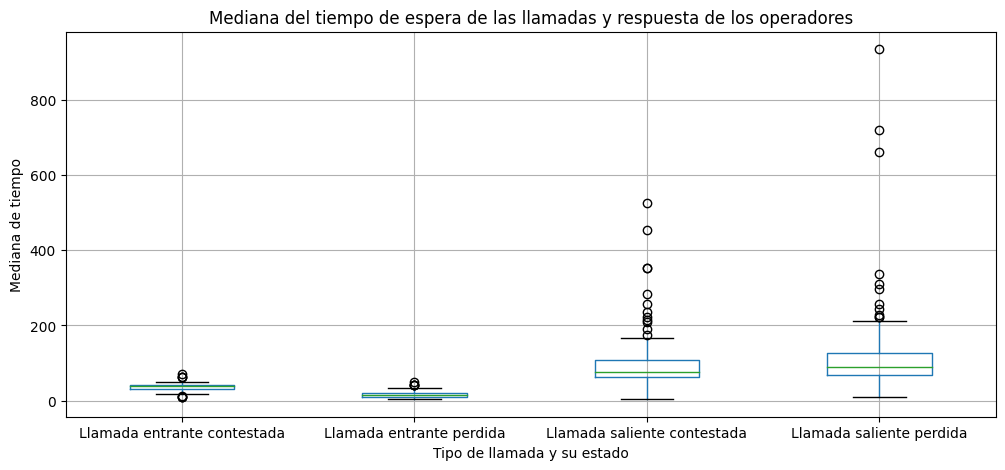

In [16]:
# Grafico de caja
ax = gpb_waiting_time.boxplot(grid=True, 
                              figsize=[12, 5]  
                             )
labels = ['Llamada entrante contestada', 'Llamada entrante perdida', 'Llamada saliente contestada', 'Llamada saliente perdida']
ax.set_xticklabels(labels)
ax.set_xlabel('Tipo de llamada y su estado')
ax.set_ylabel('Mediana de tiempo')
ax.set_title('Mediana del tiempo de espera de las llamadas y respuesta de los operadores')
plt.show()

- El tiempo de espera respecto a las llamadas perdidas evidencia que las llamadas salientes, evidencia valores anomalos debido a la diferencia entre el promedio y la mediana de los valores, donde los primeros son superiores de un 50% a un 80% aproximadamente, sin embargo las **llamadas internas perdidas** tienen una diferencia del 26% en la espera de las llamadas; por tanto se tiene como **valores de referencia las medianas**. 

Indiferentemente del estado de respuesta de las llamadas salientes (respondidas o perdidas) tienen el registro de 2 a 8 veces superior a las llamadas entrantes, ademas la cantidad de llamadas se estabiliaza despues de septiembre, estando a la vanguardia las llamadas salientes perdidas teniendo un rango de diferencia con el promedio de un 22% y aun así manteniendo valores anomalos, al igual que las llamadas salientes contestadas.

#### Promedio de la cantidad de llamadas, segun el estado de estas

In [17]:
# Agrupar respecto a las fechas y estado de las llamadas, promediando la cantidad de estas
gpb_call_count = df_operator.pivot_table(columns=['internal','is_missed_call'],
                                         index='day_format',
                                         values='calls_count',
                                         aggfunc=['mean','median'])
display(gpb_call_count.mean())
gpb_call_count=gpb_call_count['median']

# Agrupar respecto a los meses y estado de las llamadas, promediando la cantidad de estas
gpb_call_count_monthly = df_operator.pivot_table(columns=['internal','is_missed_call'],
                                                 index='month_format',
                                                 values='calls_count',
                                                 aggfunc=['mean','median'])
gpb_call_count_monthly=gpb_call_count_monthly['median']

        internal  is_missed_call
mean    False     False             19.298768
                  True              23.858224
        True      False              2.418674
                  True               1.894309
median  False     False              4.995763
                  True               6.588983
        True      False              1.781553
                  True               1.331858
dtype: float64

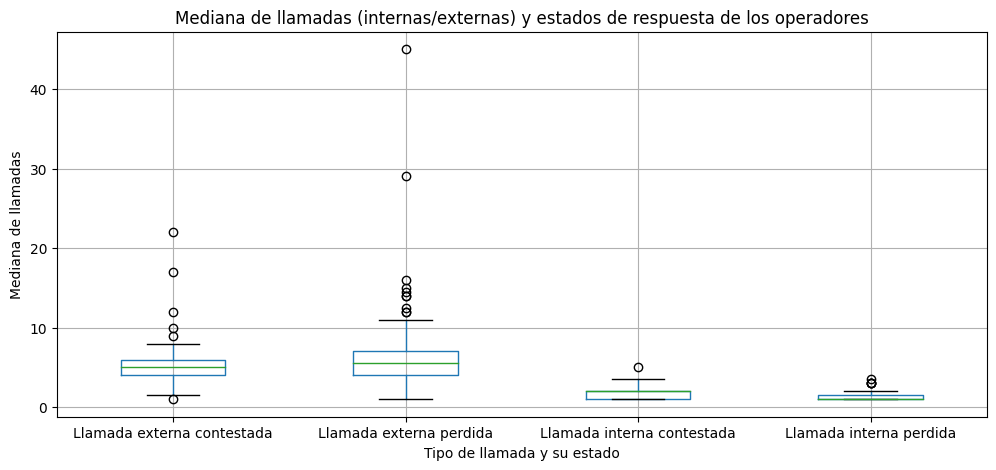

In [18]:
# Grafico de caja
ax = gpb_call_count.boxplot(grid=True, 
                              figsize=[12, 5]
                             )
labels = ['Llamada externa contestada', 'Llamada externa perdida', 'Llamada interna contestada', 'Llamada interna perdida']
ax.set_xticklabels(labels)
ax.set_xlabel('Tipo de llamada y su estado')
ax.set_ylabel('Mediana de llamadas')
ax.set_title('Mediana de llamadas (internas/externas) y estados de respuesta de los operadores')
plt.show()

- La cantidad de llamadas referente a las condición y tipo de llamadas, evidencia valores anomalos, esto se ve con los promedios y medianas con una diferencia maxima de un 74% aproximadamente en las llamadas externas contestadas y perdidas; por otra parte las llamadas internas tienen una diferencia de un 26% a 29%. Se mantiene el valor de referencia en las medianas.

Por tanto el tiempo promedio de las llamadas externas contestadas y perdias es 4 veces superior a las internas, pese al uso de valores de referencia de medianas existen valores anomalos en las llamadas externas, se debe tener en cuentas que los ultimos dias de septiembre hubo una anomalia de cantidad de llamadas externas perdidas.

#### Promedio de la cantidad de llamadas, segun al estado de estas

In [19]:
# Agrupar respecto a las fechas, segun el estado de las llamadas, promediando la cantidad de llamadas
gpb_call_duration = df_operator.pivot_table(columns=['internal','is_missed_call'],
                                            index='day_format',
                                            values='call_duration',
                                            aggfunc=['mean','median'])
display(gpb_call_duration.mean())
gpb_call_duration=gpb_call_duration['median']

# Agrupar respecto a los meses, segun el estado de las llamadas, promediando la cantidad de llamadas
gpb_call_duration_monthly = df_operator.pivot_table(columns=['internal','is_missed_call'],
                                                    index='month_format',
                                                    values='call_duration',
                                                    aggfunc=['mean','median'])
gpb_call_duration_monthly=gpb_call_duration_monthly['median']

        internal  is_missed_call
mean    False     False             1919.758236
                  True                 1.093400
        True      False              157.058227
                  True                 0.415394
median  False     False              524.478814
                  True                 0.000000
        True      False               87.616505
                  True                 0.000000
dtype: float64

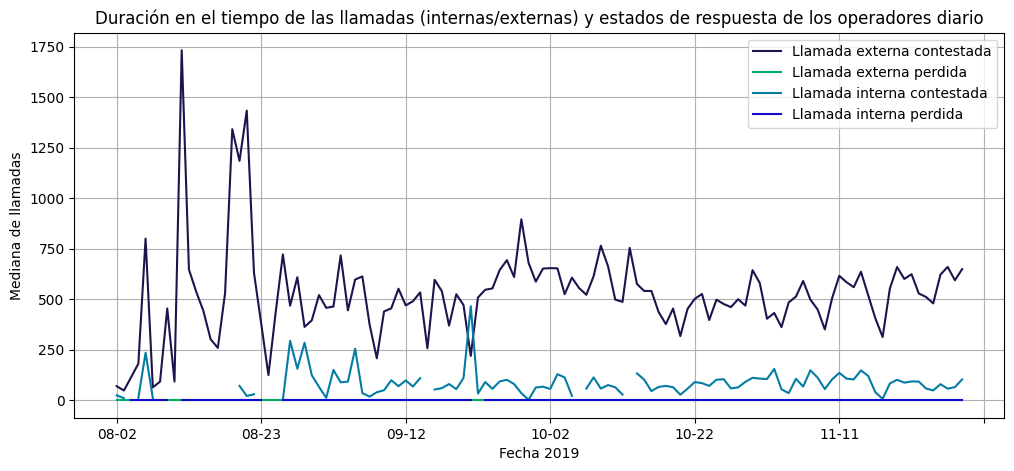

In [20]:
# Grafico de líneas general
gpb_call_duration.plot(grid=True, 
                       figsize=[12, 5],
                       title='Duración en el tiempo de las llamadas (internas/externas) y estados de respuesta de los operadores diario',
                       xlabel= 'Fecha 2019',
                       ylabel='Mediana de llamadas',
                       color=['#20124dff', '#00af65ff','#047ca3ff','#130ccdff']
                      )
plt.legend(['Llamada externa contestada', 'Llamada externa perdida', 'Llamada interna contestada', 'Llamada interna perdida'])
plt.show()

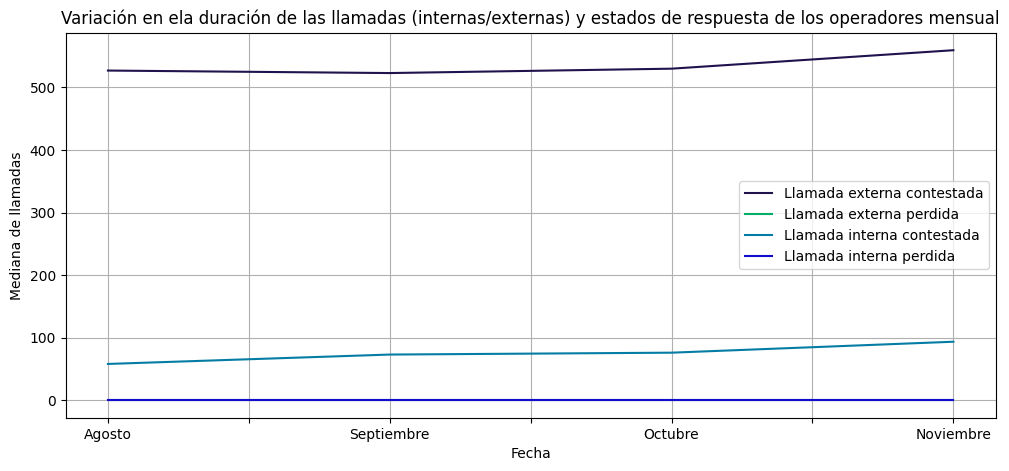

In [21]:
# Grafico de líneas mensual
gpb_call_duration_monthly.plot(grid=True, 
                               figsize=[12, 5],
                               title='Variación en ela duración de las llamadas (internas/externas) y estados de respuesta de los operadores mensual',
                               xlabel= 'Fecha',
                               ylabel='Mediana de llamadas',
                               color=['#20124dff', '#00af65ff','#047ca3ff','#130ccdff']
                              )
plt.xticks([8, 8.5, 9, 9.5, 10, 10.5, 11 ],['Agosto', ' ','Septiembre',' ', 'Octubre', ' ','Noviembre']) 
plt.legend(['Llamada externa contestada', 'Llamada externa perdida', 'Llamada interna contestada', 'Llamada interna perdida'])
plt.show()

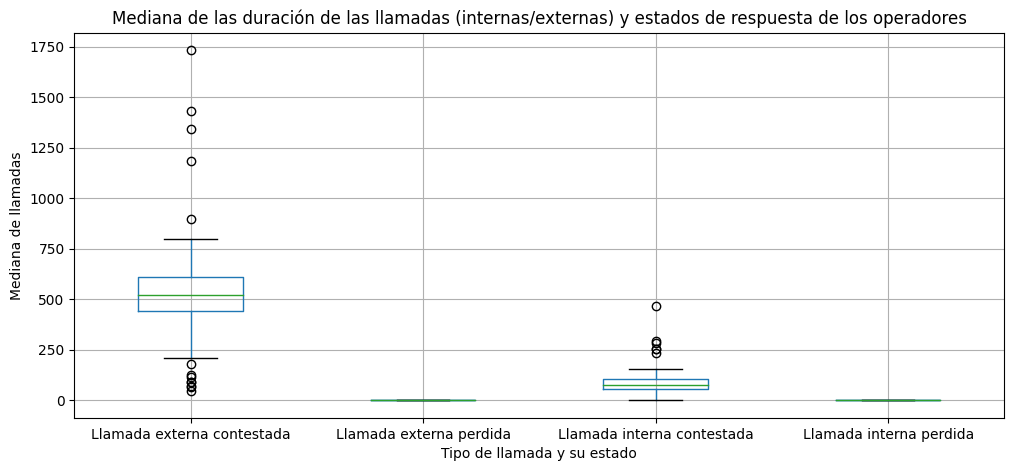

In [22]:
# Grafico de caja
ax = gpb_call_duration.boxplot(grid=True, 
                              figsize=[12, 5]
                             )
labels = ['Llamada externa contestada', 'Llamada externa perdida', 'Llamada interna contestada', 'Llamada interna perdida']
ax.set_xticklabels(labels)
ax.set_xlabel('Tipo de llamada y su estado')
ax.set_ylabel('Mediana de llamadas')
ax.set_title('Mediana de las duración de las llamadas (internas/externas) y estados de respuesta de los operadores')
plt.show()

- La duración promedio de las llamadas respecto al estado de estas se van a tener en cuenta solamente las llamadas contestadas, se mantiene la constante de los valores anómalos del promedio respecto a las medianas teniendo una diferencia de las llamadas externas de un 72% y las internas de un 44%.

Los registros del mes de agosto evidencian registros nulos de llamadas perdidas y a su vez valores 2 a 3 veces aproximadamente, superiores a la media de las llamadas externas contestadas

 ### Clientes

#### Cantidad de plan adquiridos por usuarios

In [23]:
# Agrupar por fecha y plan, contabilizando los usuarios que lo han adquirido
gpb_client = df_client.pivot_table(columns='tariff_plan',
                                   index='day_start',
                                   values='user_id',
                                   aggfunc = 'count')
display(gpb_client.mean())
display(gpb_client.median())

# Agrupar por fecha y plan, contabilizando los usuarios que lo han adquirido mensualmente
gpb_client_month = df_client.pivot_table(columns='tariff_plan',
                                   index='month_start',
                                   values='user_id',
                                   aggfunc = 'count')

tariff_plan
A    1.041096
B    3.575342
C    5.410959
dtype: float64

tariff_plan
A    1.0
B    4.0
C    5.0
dtype: float64

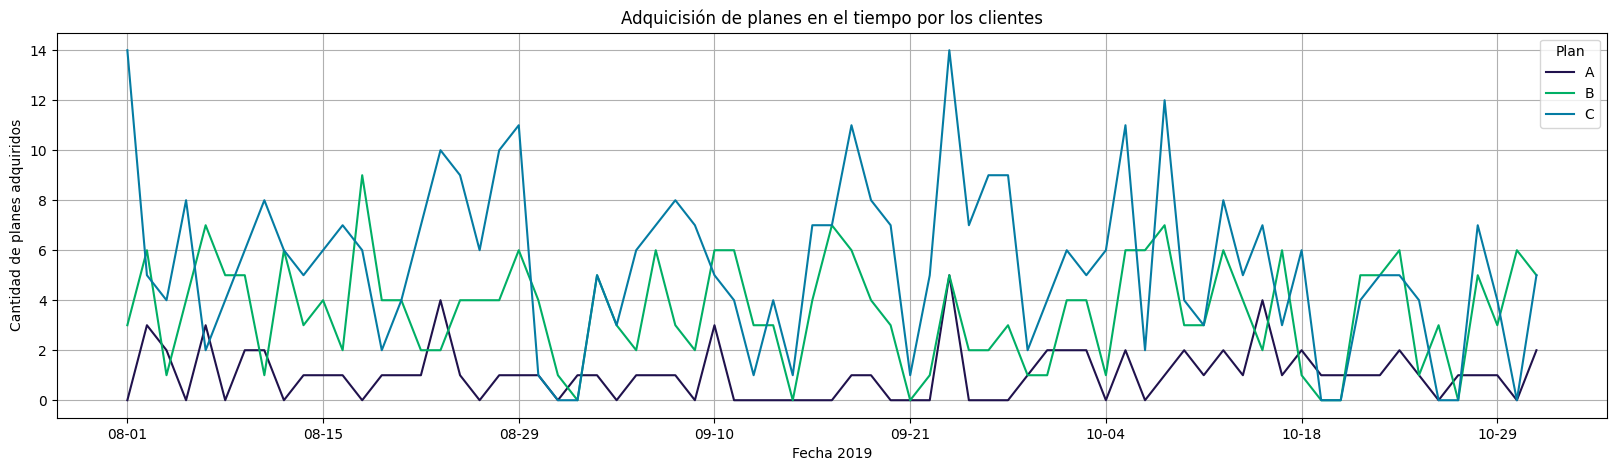

In [24]:
# Grafico de líneas
gpb_client.plot(grid=True,
                figsize=[20,5],
                title='Adquicisión de planes en el tiempo por los clientes',
                xlabel='Fecha 2019',
                ylabel='Cantidad de planes adquiridos',
                color=['#20124dff', '#00af65ff','#047ca3ff']
               )
plt.legend(title='Plan')
plt.show()

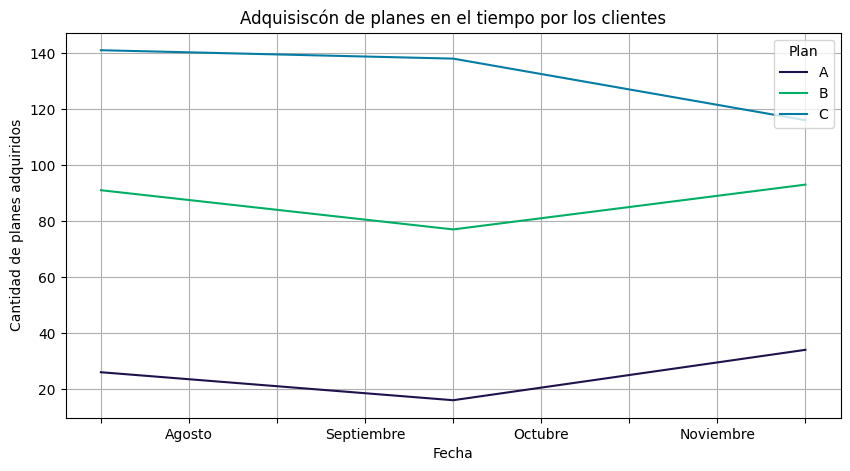

In [25]:
# Grafico de líneas
gpb_client_month.plot(grid=True,
                      figsize=[10,5],
                      color=['#20124dff', '#00af65ff','#047ca3ff'],
                      title='Adquisiscón de planes en el tiempo por los clientes',
                      xlabel='Fecha',
                      ylabel='Cantidad de planes adquiridos')
plt.xticks([8.00, 8.25, 8.5, 8.75, 9.00, 9.25, 9.5, 9.75, 10.00],['','Agosto', ' ','Septiembre',' ','Octubre', ' ','Noviembre','']) 
plt.legend(title='Plan')
plt.show()

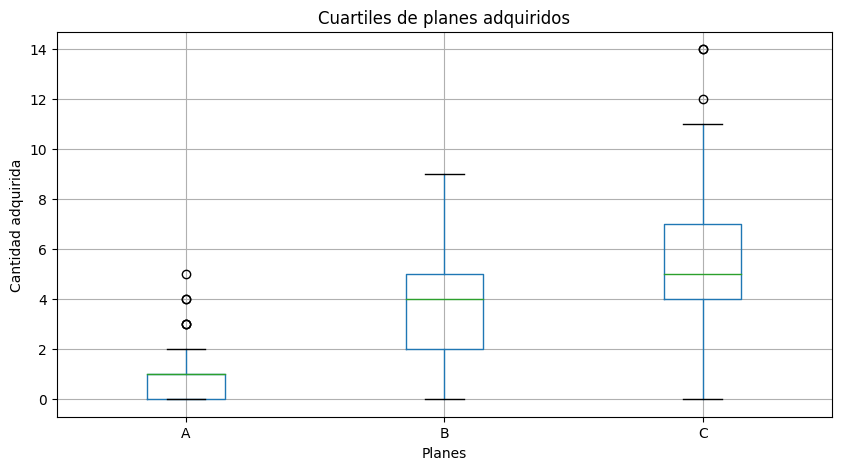

In [26]:
# Grafico de caja
ax = gpb_client.boxplot(grid=True, 
                        figsize=[10, 5]
                             )
ax.set_xlabel('Planes')
ax.set_ylabel('Cantidad adquirida')
ax.set_title('Cuartiles de planes adquiridos')
plt.show()

- El plan más popular es el C, seguido por el B y A; para mediados de septiembre hubo una variación de la perdida de usuarios de los planes A y B, para despues aumentar un 10% de la adquisión de sus usuarios; por otro parte para la misma fecha la adquisición constante de usuarios del plan C, se reduce en un 15%.

#### Promedio de la duración de las llamadas segun el plan de los clientes y el estado de las llamadas

In [27]:
# Agrupar respecto a las fechas, segun el plan de los clientes y las llamadas no contestadas, promediando la cantidad de llamadas
gpb_call_duration_client = df.pivot_table(columns=['tariff_plan','is_missed_call'],
                                          index='day_format',
                                          values='call_duration',
                                          aggfunc=['mean','median'])
display(gpb_call_duration_client.mean())
gpb_call_duration_client=gpb_call_duration_client['median']

# Agrupar respecto a los mese, segun el plan de los clientes y las llamadas no contestadas, promediando la cantidad de llamadas
gpb_call_duration_client_month= df.pivot_table(columns=['tariff_plan','is_missed_call'],
                                          index='month_format',
                                          values='call_duration',
                                          aggfunc=['mean','median'])
gpb_call_duration_client_month=gpb_call_duration_client_month['median']

        tariff_plan  is_missed_call
mean    A            False             5690.782933
                     True                 2.359654
        B            False             1034.455423
                     True                 0.585953
        C            False              887.512616
                     True                 0.213942
median  A            False             1278.500000
                     True                 0.000000
        B            False              482.127119
                     True                 0.000000
        C            False              362.917431
                     True                 0.004717
dtype: float64

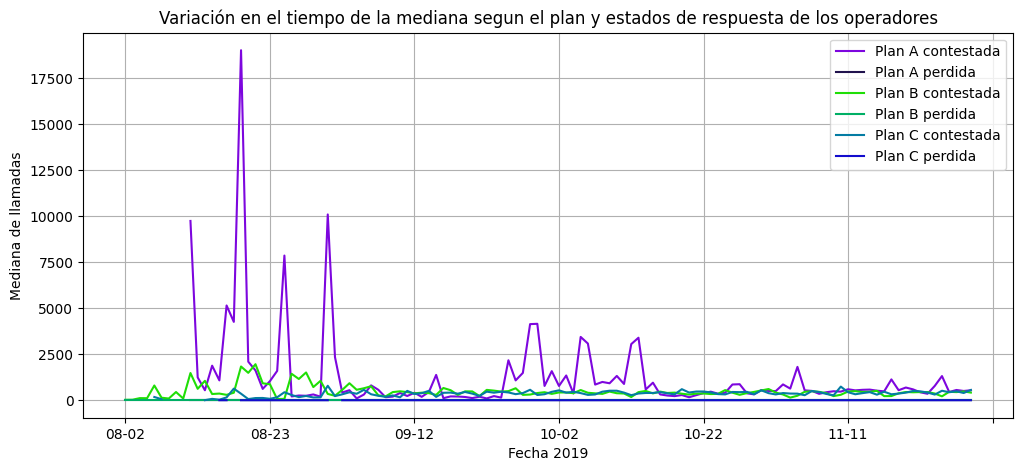

In [28]:
# Grafico de líneas general
gpb_call_duration_client.plot(grid=True, 
                              figsize=[12, 5],
                              title='Variación en el tiempo de la mediana segun el plan y estados de respuesta de los operadores',
                              xlabel= 'Fecha 2019',
                              ylabel='Mediana de llamadas',
                              color=['#7d06deff','#20124dff', '#1fde06ff','#00af65ff','#047ca3ff','#130ccdff']
                             )
plt.legend(['Plan A contestada', 'Plan A perdida', 'Plan B contestada', 'Plan B perdida','Plan C contestada', 'Plan C perdida',])
plt.show()

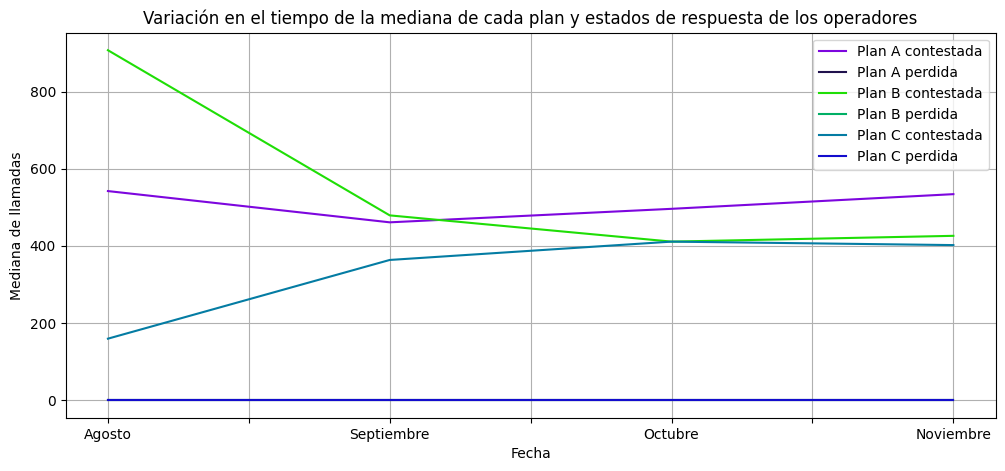

In [29]:
# Grafico de líneas mensual
gpb_call_duration_client_month.plot(grid=True, 
                                    figsize=[12, 5],
                                    title='Variación en el tiempo de la mediana de cada plan y estados de respuesta de los operadores',
                                    xlabel= 'Fecha',
                                    ylabel='Mediana de llamadas',
                                    color=['#7d06deff','#20124dff', '#1fde06ff','#00af65ff','#047ca3ff','#130ccdff']
                                   )

plt.xticks([8, 8.5, 9, 9.5, 10, 10.5, 11 ],['Agosto', ' ','Septiembre',' ', 'Octubre', ' ','Noviembre']) 
plt.legend(['Plan A contestada', 'Plan A perdida', 'Plan B contestada', 'Plan B perdida','Plan C contestada', 'Plan C perdida',])
plt.show()

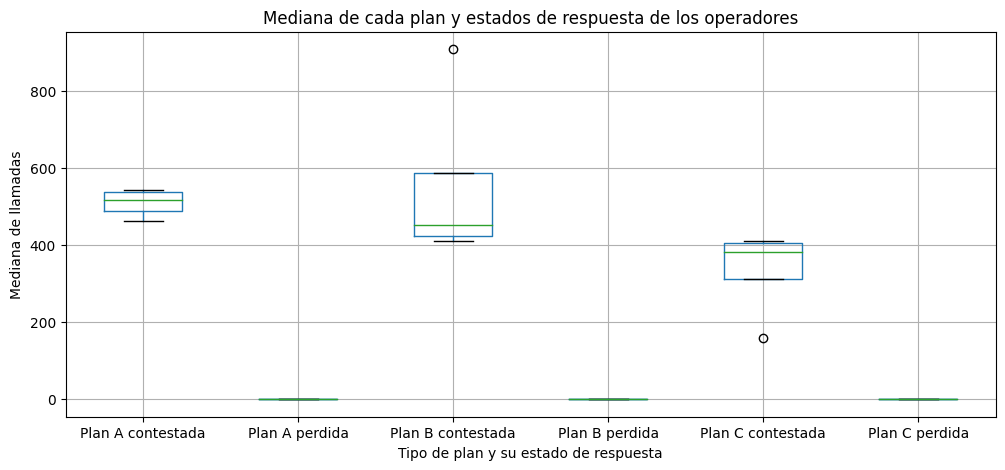

In [30]:
# Grafico de caja
ax = gpb_call_duration_client_month.boxplot(grid=True, 
                              figsize=[12, 5]
                             )
labels = ['Plan A contestada', 'Plan A perdida', 'Plan B contestada', 'Plan B perdida','Plan C contestada', 'Plan C perdida',]
ax.set_xticklabels(labels)
ax.set_xlabel('Tipo de plan y su estado de respuesta')
ax.set_ylabel('Mediana de llamadas')
ax.set_title('Mediana de cada plan y estados de respuesta de los operadores')
plt.show()

- La diferencia del estado de las llamadas, segun los planes es superior al 50% según el prodio y la mediana; me dejaran a un lado las llamadas perdidas

Se evidencia que el mes de septeimbre el plan A tiene anomalia de 3 a 6 veces superioral promedio de la duración de las llamadas, sin embargo este plan inicio su actividad a mediados del mes de agosto a diferencia del plan B, que tiene un comportamiendo más estable a lo largo de los registros. Se debe tener en cuenta para el mes de septiembre el comportamiento del plan A y C aumento, mientras que el plan B disminuyo un 27% aproximadamente, pese a ello el promedio de duración de llamadas ronda de 400 a 500

#### Tiempo de espera de los planes de cada cliente y el estado de las llamadas

In [31]:
# Agrupar respecto a las fechas, segun el plan de los clientes y las llamadas no contestadas, promediando la cantidad de llamadas
gpb_call_waiting_time_client = df.pivot_table(columns=['tariff_plan','is_missed_call'],
                                              index='day_format',
                                              values='call_waiting_time',
                                              aggfunc=['mean','median'])
display(gpb_call_waiting_time_client.mean())
gpb_call_waiting_time_client=gpb_call_waiting_time_client['median']

# Agrupar respecto a los mese, segun el plan de los clientes y las llamadas no contestadas, promediando la cantidad de llamadas
gpb_call_waiting_time_client_month = df.pivot_table(columns=['tariff_plan','is_missed_call'],
                                              index='month_format',
                                              values='call_waiting_time',
                                              aggfunc=['mean','median'])
gpb_call_waiting_time_client_month=gpb_call_waiting_time_client_month['median']

        tariff_plan  is_missed_call
mean    A            False             1024.993072
                     True              2152.564439
        B            False              134.379424
                     True               173.278552
        C            False              134.144768
                     True               259.228190
median  A            False              246.518182
                     True              1098.692661
        B            False               52.877119
                     True                80.483051
        C            False               48.995413
                     True                82.325472
dtype: float64

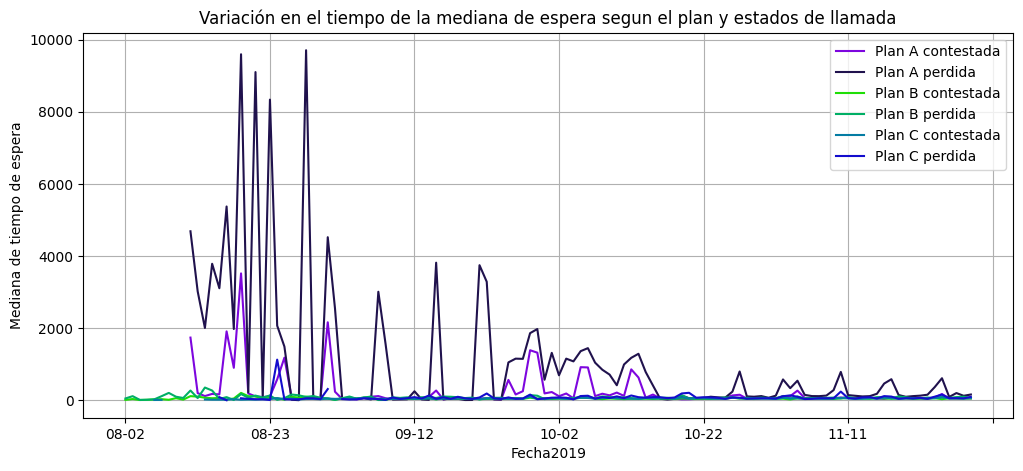

In [32]:
# Grafico de líneas general
gpb_call_waiting_time_client.plot(grid=True, 
                                  figsize=[12, 5],
                                  title= 'Variación en el tiempo de la mediana de espera segun el plan y estados de llamada',
                                  xlabel= 'Fecha2019',
                                  ylabel='Mediana de tiempo de espera',
                                  color=['#7d06deff','#20124dff', '#1fde06ff','#00af65ff','#047ca3ff','#130ccdff']
                                 )
plt.legend(['Plan A contestada', 'Plan A perdida', 'Plan B contestada', 'Plan B perdida','Plan C contestada', 'Plan C perdida',])
plt.show()

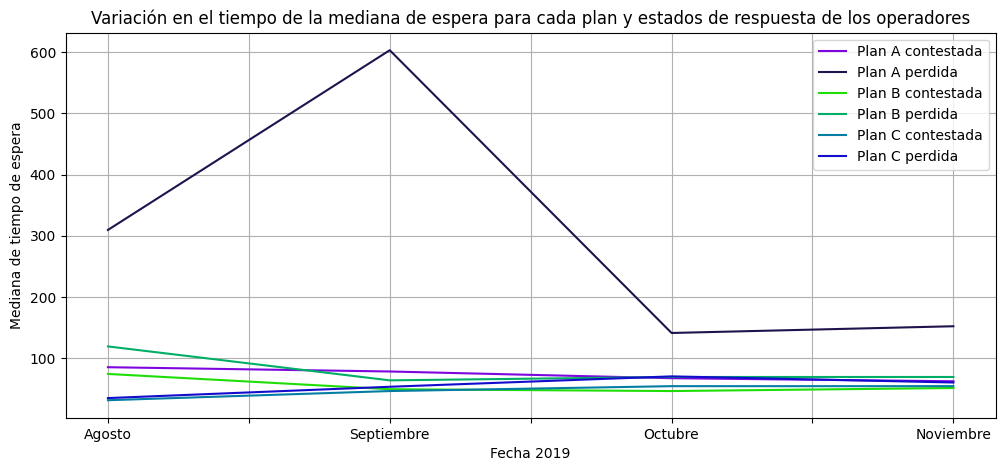

In [33]:
# Grafico de líneas mensual
gpb_call_waiting_time_client_month.plot(grid=True, 
                                        figsize=[12, 5],
                                        title='Variación en el tiempo de la mediana de espera para cada plan y estados de respuesta de los operadores',
                                        xlabel= 'Fecha 2019',
                                        ylabel='Mediana de tiempo de espera',
                                        color=['#7d06deff','#20124dff', '#1fde06ff','#00af65ff','#047ca3ff','#130ccdff']
                                       )

plt.xticks([8, 8.5, 9, 9.5, 10, 10.5, 11 ],['Agosto', ' ','Septiembre',' ', 'Octubre', ' ','Noviembre']) 
plt.legend(['Plan A contestada', 'Plan A perdida', 'Plan B contestada', 'Plan B perdida','Plan C contestada', 'Plan C perdida',])
plt.show()

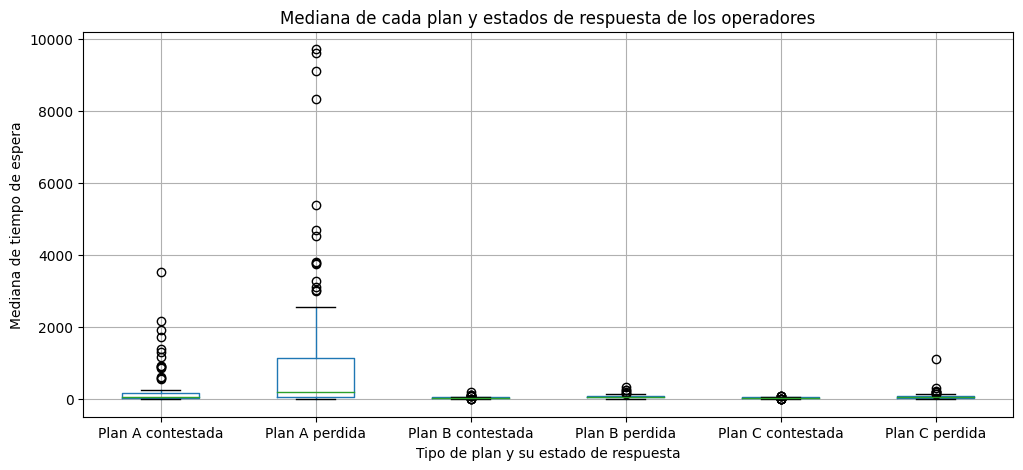

In [34]:
# Grafico de caja
ax = gpb_call_waiting_time_client.boxplot(grid=True, 
                              figsize=[12, 5]
                             )
labels = ['Plan A contestada', 'Plan A perdida', 'Plan B contestada', 'Plan B perdida','Plan C contestada', 'Plan C perdida',]
ax.set_xticklabels(labels)
ax.set_xlabel('Tipo de plan y su estado de respuesta')
ax.set_ylabel('Mediana de tiempo de espera')
ax.set_title('Mediana de cada plan y estados de respuesta de los operadores')
plt.show()

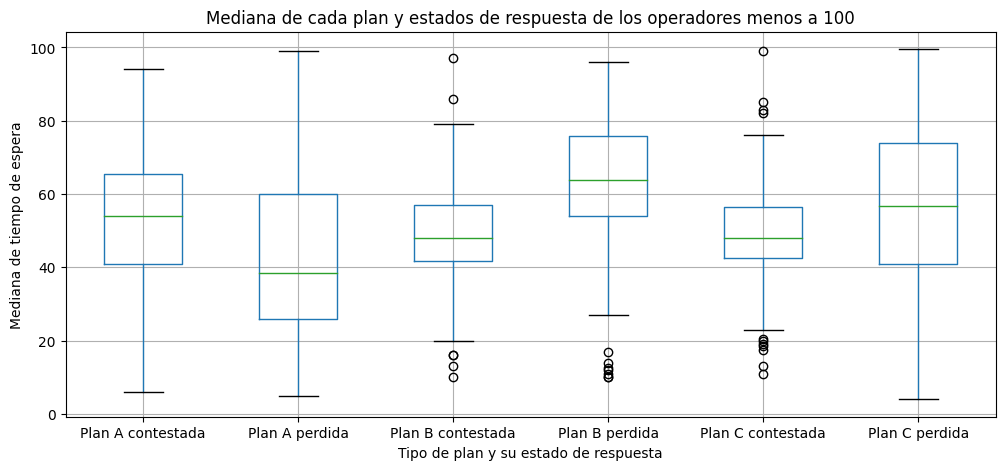

In [35]:
#Filtrado de respuestas
gpb_call_waiting_time_client_filter= gpb_call_waiting_time_client.reset_index()
gpb_call_waiting_time_client_filter = gpb_call_waiting_time_client_filter[gpb_call_waiting_time_client_filter[['A','B','C']]<100]

# Grafico de caja
ax = gpb_call_waiting_time_client_filter.boxplot(grid=True, 
                                                 figsize=[12, 5]
                             )
labels = ['Plan A contestada', 'Plan A perdida', 'Plan B contestada', 'Plan B perdida','Plan C contestada', 'Plan C perdida',]
ax.set_xticklabels(labels)
ax.set_xlabel('Tipo de plan y su estado de respuesta')
ax.set_ylabel('Mediana de tiempo de espera')
ax.set_title('Mediana de cada plan y estados de respuesta de los operadores menos a 100')
plt.show()

- El tiempo de espera en cada uno de los planes se evidencian registros anómalos, referente a los promedios respecto a las medianas.

Se muestra como el tiempo de espera de las llamadas perdidas son es superior a las contestadas por más de un 40%, en caso del grupo A llega a 77%, el mayor pico de tiempo para este grupo llega hasta septiembre, para después reducirse en un 75%. El promedio del tiempo de espera de llamadas se encuentra en de 100  

## Análisis de cohortes (fecha y comportamiento)

In [36]:
# Union de los datasets principales
df_cohortes = df_client.merge(df_operator, how='right', on='user_id')

# Determinar los cohortes de cada usuario
df_cohortes['cohorte'] = df_cohortes['month_format'] - df_cohortes['month_start']
df_cohortes.head(2)

,user_id,tariff_plan,date_start,month_start,day_start,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,date_format,month_format,day_format,call_waiting_time,cohorte
0,166377,B,2019-08-01,8,08-01,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,2019-08-05,8,08-05,5,0
1,166377,B,2019-08-01,8,08-01,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,2019-08-05,8,08-05,1,0


### Tasa de retensión de los clientes

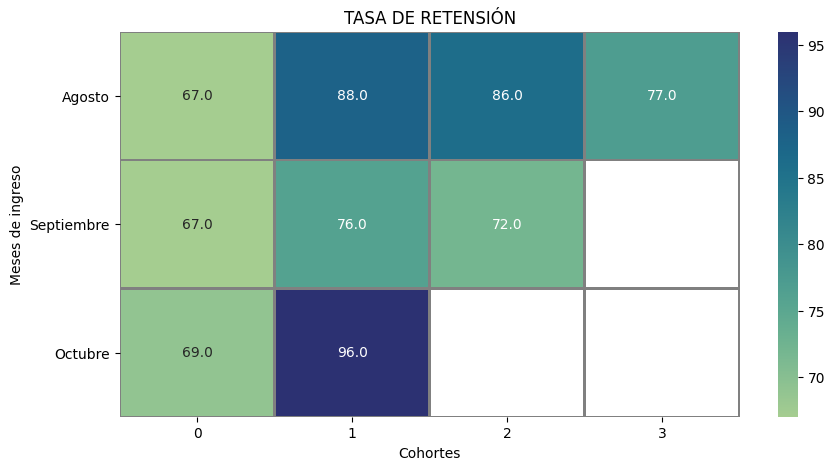

In [37]:
# Tabla pivote contrastando la fecha de inicio respecto la tasa de retensión de los clientes
cohorte_user = df_cohortes.pivot_table(index = 'month_start',
                                        columns ='cohorte',
                                        values = 'user_id',
                                        aggfunc = 'nunique')

# Mapa de calor
plt.figure(figsize=(10, 5))
plt.title('TASA DE RETENSIÓN')
heatmap= sns.heatmap(cohorte_user,
                     annot=True,
                     fmt='1',
                     linewidths=1,
                     linecolor='gray',
                     cmap='crest')
heatmap.set_xlabel('Cohortes')
heatmap.set_ylabel('Meses de ingreso')
index = ['Agosto', 'Septiembre', 'Octubre']
heatmap.set_yticklabels(index, rotation=0)
plt.show()

### Cantidad de llamadas

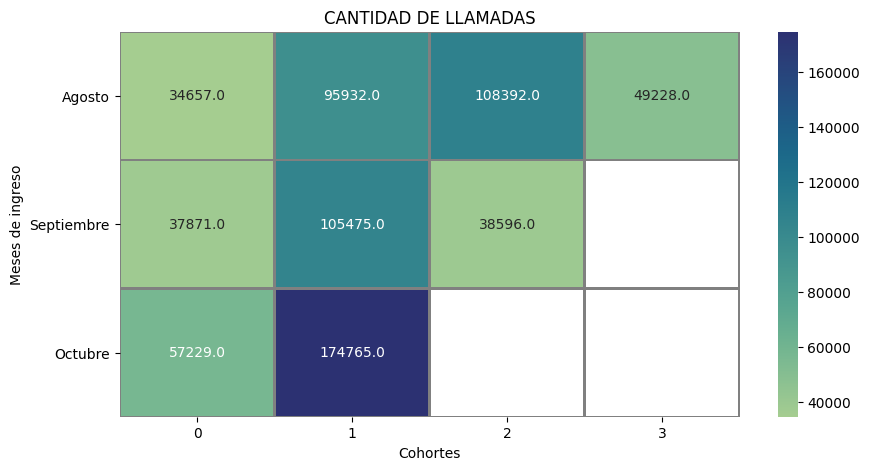

In [38]:
# Tabla pivote contrastando la fecha de inicio respecto a la cantidad de llamadas
cohorte_calls = df_cohortes.pivot_table(index = 'month_start',
                                        columns ='cohorte',
                                        values = 'calls_count',
                                        aggfunc = 'sum')

# Mapa de calor
plt.figure(figsize=(10, 5))
plt.title('CANTIDAD DE LLAMADAS')
heatmap= sns.heatmap(cohorte_calls,
                     annot=True,
                     fmt='1',
                     linewidths=1,
                     linecolor='gray',
                     cmap='crest')
heatmap.set_xlabel('Cohortes')
heatmap.set_ylabel('Meses de ingreso')
index = ['Agosto', 'Septiembre', 'Octubre']
heatmap.set_yticklabels(index, rotation=0)
plt.show()

#### Cantidad de llamadas recibidas

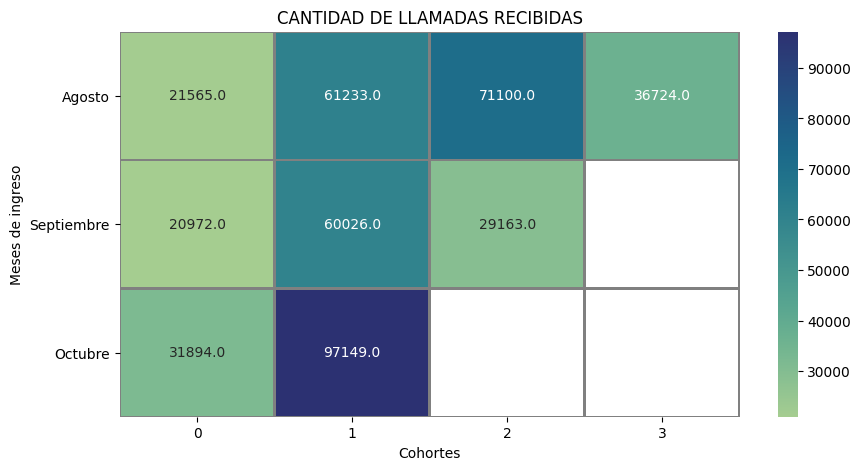

In [39]:
# Filtrado de las llamadas recibidas
df_cohortes_calls = df_cohortes[df_cohortes['is_missed_call']== False]

# Tabla pivote contrastando la fecha de inicio respecto a la cantidad de llamadas recibidas
cohorte_calls_received = df_cohortes_calls.pivot_table(index = 'month_start',
                                                       columns ='cohorte',
                                                       values = 'calls_count',
                                                       aggfunc = 'sum')

# Mapa de calor
plt.figure(figsize=(10, 5))
plt.title('CANTIDAD DE LLAMADAS RECIBIDAS')
heatmap= sns.heatmap(cohorte_calls_received,
                     annot=True,
                     fmt='1',
                     linewidths=1,
                     linecolor='gray',
                     cmap='crest')
heatmap.set_xlabel('Cohortes')
heatmap.set_ylabel('Meses de ingreso')
index = ['Agosto', 'Septiembre', 'Octubre']
heatmap.set_yticklabels(index, rotation=0)
plt.show()

Existe una constante en el comportamiento del primera al `segundo mes con un aumento del 30%` de las actividades de los usuarios y su ingreso al servicio, no se evidencian ingresos en `noviembre`. La retención de usuarios y aumento de los usuarios a los largo de los meses, teniendo un `ingreso de 67 usuarios` aproximadamente teniendo comportamiento establecido, teniendo una diferenciación  en septiembre, con un 13% en el segundo mes de registro; continuando con un leve descenso de un 3%. 
Respecto a la cantidad de llamadas en el mes de noviembre se ve una disminución de un 36% a un 45%, exceptuando en el último mes de ingresos (octubre) donde se mantiene el aumento estándar del segundo mes posterior al ingreso.

## Calcular los KPIs significativos

### Customer Effort Score (CES)

In [40]:
# Filtrar las llamadas perdididas
df_calls_count_missed = df_cohortes[df_cohortes['is_missed_call']==True].groupby(['user_id','month_start','internal'])['calls_count'].sum().reset_index()
df_calls_count_missed.columns = ['user_id','month_start','internal','calls_missed']

# Sumatoria total de las llamadas
df_calls_count_total = df_cohortes.groupby(['user_id','month_start','internal'])['calls_count'].sum().reset_index()
df_calls_count_total.columns = ['user_id','month_start','internal','calls_total']

# Unir las tablas de las llamadas totales y las perdidas
df_ces = df_calls_count_missed.merge(df_calls_count_total, how='inner', on=['user_id','month_start','internal'])

# Calcular el esfuezo de adquicisión de un cliente                                   
df_ces['ces(%)'] = ((df_ces['calls_missed']/df_ces['calls_total'])*100).round(2)

# Mostrar la tabla de la media y mediana por cada mes en el esfuezo de adquicisión de un cliente
df_ces.groupby(['month_start','internal']).agg({'ces(%)':['median','mean']})

ces(%)           
                      median       mean
month_start internal                   
8           False     26.600  27.216024
            True      93.725  77.109286
9           False     23.635  29.328026
            True      66.670  67.881333
10          False     29.910  31.840563
            True      88.890  72.435122

### Net Promoter Score (NPS)

In [41]:
# Filtrar las llamadas contestadas
df_calls_count_recived = df_cohortes[df_cohortes['is_missed_call']!=True].groupby(['user_id','month_start','internal'])['calls_count'].sum().reset_index()
df_calls_count_recived.columns = ['user_id','month_start','internal','calls_recived']

# Unir las llamas perdidas, recibidas y generales
df_nps = df_calls_count_missed.merge(df_calls_count_recived, how='inner', on=['user_id','month_start','internal']).merge(df_calls_count_total, how='inner', on=['user_id','month_start','internal'])

# Calcular el porcentaje de la puntuación promotora neta 
df_nps['nps(%)'] = ((df_nps['calls_recived']-df_nps['calls_missed'])/df_nps['calls_total'])*100

# Mostrar la tabla de la media y mediana por cada mes en la puntuación promotora neta 
df_nps.groupby(['month_start','internal']).agg({'nps(%)':['median','mean']})

nps(%)           
                         median       mean
month_start internal                      
8           False     46.793003  45.568296
            True     -24.494949 -14.539388
9           False     54.273504  45.164780
            True     -13.664596  -9.666253
10          False     40.550586  38.266108
            True       0.000000  -1.724541

### First Response Time (FRT)

In [42]:
# Obtener la fecha mínima por usuario
min_date_per_user = df_cohortes.groupby('user_id')['date_format'].min().reset_index()
min_date_per_user.columns = ['user_id', 'min_date']

# Unir dataset filtrado y el original
df_merged = pd.merge(min_date_per_user, df_cohortes, left_on=['user_id', 'min_date'], right_on=['user_id', 'date_format'])

# Filtrar las columnas mostradas
df_merged = df_merged[['month_format','user_id', 'calls_count', 'call_duration', 'call_waiting_time', 'total_call_duration']]

# Mostrar la tabla de la media y mediana de la cantidad de llamadas, el tiempo de espera, la duración de la llamada y el total del tiempo mensuales
df_merged.groupby('month_format').agg({'calls_count':['mean','median'],
                                       'call_waiting_time':['mean','median'],
                                       'call_duration':['mean','median'], 
                                       'total_call_duration':['mean','median']})

calls_count        call_waiting_time        call_duration         \
                    mean median              mean median          mean median   
month_format                                                                    
8               8.296089      2        153.245810   26.0    501.944134   20.0   
9               2.968254      1         42.031746   19.0    139.325397   15.5   
10              7.814394      2        133.034091   22.0    366.348485   16.0   
11              3.068182      2         37.420455   17.5     95.136364   13.5   

             total_call_duration         
                            mean median  
month_format                             
8                     655.189944   67.0  
9                     181.357143   48.5  
10                    499.382576   66.0  
11                    132.556818   40.5

### Tiempo de espera

In [43]:
# Mostrar la tabla de la media y mediana del tiempo de espera y la duracion de la llamada
df.groupby('month_format').agg({'call_waiting_time':['mean','median','max'],
                                         'call_duration':['mean','median','max']})

call_waiting_time               call_duration               
                          mean median    max          mean median     max
month_format                                                             
8                   489.790476     65  15150   1626.406122     50   66966
9                   393.593917     53  33367   1286.757532     84  144395
10                  348.184948     60  45312   1056.116308    106  120175
11                  239.091509     62  46474    822.043341    120   33897

Se muestra como la facilidad de las llamadas internas son mucho más faciles de ejecutar, respecto a las realizadas con los clientes; pese a ello existen un número superior de las llamadas internas pérdidas, además del 40% al 60% de las llamadas de los usuarios, no fueron contestadas. Agrese un tiempo de espera de 20, una duración entre 13 a 20; pese a ello existe un excedente de 10 a 20 en cada llamada, que al revisar el tiempo de espera y duración de llamadas general exceden 3 veces la primera interacción, con valores que llegan hasta 46000 en espera y 1444395 de duración de llamada. Se evidencian valores atípicos en los estados de las llamadas y a suves la cantidad de veces que llaman los usuarios es de 2 ocasiones en su primera llamada, sin embargo hay algunos que llegan a 8.

## Contruir un modelo piloto para predecir los operadores ineficientes (aprendizaje supervisado)

### Preparación de las categorias

In [44]:
# Copiar el dataSet
df_prep_model = df_operator.copy()

#Reemplazar los valores string y bool de las columnas correspondientes
df_prep_model['direction'] = df_prep_model['direction'].replace({'out': 0, 'in': 1})
df_prep_model[['internal','is_missed_call']] = df_prep_model[['internal','is_missed_call']].replace({False: 0, True: 1})

# Borrar valores nulos
df_prep_model = df_prep_model.dropna()

# Especificar las columnas requeridas
df_prep_model = df_prep_model[['operator_id', 'direction', 'internal', 'is_missed_call', 'calls_count','call_waiting_time', 'call_duration','total_call_duration']]

In [54]:
# Determinar las metricas por operador
# Agrupar los operadoresm calcular el comportamiento general de los operadores
grp_prep_model= df_prep_model.groupby('operator_id').agg({'operator_id':'count',
                                                          'direction':'sum', 
                                                          'internal': 'sum',
                                                          'is_missed_call':'sum',
                                                          'calls_count':'sum',
                                                          'call_waiting_time':'median',
                                                          'call_duration':'median'})

# Nombrar las columas
grp_prep_model.columns = ['n_register', 'n_direction_in', 'n_internal_client', 'n_missed_call','n_total_calls', 'call_waiting_time_median','call_duration_median']
grp_prep_model = grp_prep_model.reset_index()

# Determinar el porcentaje de correlación en las llamadas perdidas
grp_prep_model['n_missed_call(%)'] = ((grp_prep_model['n_missed_call']/grp_prep_model['n_register'])*100).round(2)

# Unir del dataSet principal de los operdores con las metricas generales de los operadores
df_prep_model = df_prep_model.merge(grp_prep_model, how='left' , on='operator_id')
df_prep_model.head()

,operator_id,direction,internal,is_missed_call,calls_count,call_waiting_time,call_duration,total_call_duration,n_register,n_direction_in,n_internal_client,n_missed_call,n_total_calls,call_waiting_time_median,call_duration_median,n_missed_call(%)
0,880022.0,0,1,1,3,5,0,5,70,8,8,29,197,13.0,51.0,41.43
1,880020.0,0,1,1,1,1,0,1,20,7,3,6,45,8.0,36.0,30.00
2,880020.0,0,1,0,1,8,10,18,20,7,3,6,45,8.0,36.0,30.00
3,880022.0,0,0,1,3,25,0,25,70,8,8,29,197,13.0,51.0,41.43
4,880020.0,0,0,0,2,26,3,29,20,7,3,6,45,8.0,36.0,30.00


In [55]:
# Definir los rangos en que se clasifican los operadores
junior_operator = df_prep_model['n_register'].quantile(0.25)
call_waiting_time_quantile_95 = df_prep_model['call_waiting_time_median'].quantile(0.95)
call_duration_quantile_90 = df_prep_model['call_duration_median'].quantile(0.90)
percent_missed = df_prep_model['call_duration_median'].quantile(0.50)

# Función de clasificación de los operadores
def ranking(row):
    if ((row['call_waiting_time'] > call_waiting_time_quantile_95) or 
          (row['call_duration'] > call_duration_quantile_90) or
          (row['n_missed_call(%)'] > percent_missed)): #operador ineficiente
        return 0
    elif row['n_register'] < junior_operator: # operado a prueba (junior)
        return 1
    else:
        return 2 # operador eficiente
    
df_prep_model['ranking'] = df_prep_model.apply(ranking, axis=1)
df_prep_model = df_prep_model.groupby(['operator_id','n_register','n_direction_in','n_internal_client','n_missed_call','n_total_calls'])[['is_missed_call', 'calls_count','call_waiting_time','call_duration', 'total_call_duration','n_missed_call(%)','ranking']].median()
df_prep_model['ranking'] = df_prep_model['ranking'].astype(int)
df_prep_model=df_prep_model.reset_index()
df_prep_model.head()

,operator_id,n_register,n_direction_in,n_internal_client,n_missed_call,n_total_calls,is_missed_call,calls_count,call_waiting_time,call_duration,total_call_duration,n_missed_call(%),ranking
0,879896.0,117,21,15,47,930,0.0,2.0,27.0,26.0,149.0,40.17,2
1,879898.0,226,56,15,89,7312,0.0,24.5,393.0,67.0,568.0,39.38,2
2,880020.0,20,7,3,6,45,0.0,1.0,8.0,36.0,49.5,30.00,1
3,880022.0,70,8,8,29,197,0.0,2.0,13.0,51.0,125.5,41.43,2
4,880026.0,182,18,13,87,2232,0.0,11.0,112.0,26.0,252.5,47.80,2


### Modelo

In [56]:
# Dividir los datos en características (X) y la variable objetivo (y)
X = df_prep_model.drop(columns=['ranking'])
y = df_prep_model['ranking']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Ajustar el modelo RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predecir sobre los datos de prueba
y_pred = model.predict(X_test)

# Calcular métricas de clasificación
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted', zero_division=1)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted', zero_division=1)))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted', zero_division=1)))

# Reporte de clasificación
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.99      0.99      0.99       203
           2       0.98      0.99      0.98        82

    accuracy                           0.98       328
   macro avg       0.97      0.97      0.97       328
weighted avg       0.98      0.98      0.98       328



## Presentación de conclusiones

<a href='https://drive.google.com/file/d/1VCyH2zxwnRCDrj7KEnY_00YOAz2C-11t/view?usp=sharing'> Abrir la presentación: clic aquí </a>

## Concluciones generales

El 34% de las llamadas recibidas son pérdidas, de modo se sugiere una optimización de procesos en la gestión de llamadas y aumentar la capacidad de personal para la recepción de llamadas, esto beneficiara la percepción del esfuerzo en los usuarios en el uso del servicio, además de un aumento en la retención.
Las interacciones entre los operadores representan el 14% de las llamadas totales, sin embargo, llega a un 90% en el esfuerzo requerido para mejorar las llamadas, se podría buscar una regulación de las interacciones de entre los operadores, a fin de optimizar tiempo y siendo más eficiente la operación.
Se hizo una clasificación preliminar donde los operadores que tengan menos el 25% de registros, respecto a sus compañeros, se definirán como juniors; los operadores que se superan el 50% de llamadas perdidas, están en el 5% superior de las llamadas de espera o el 10% máximo en los la duración media de las llamadas, serán visto como ineficiente su trabajo; esto vislumbra una posible clasificación los trabajo de los operadores.